Machine Learning Model Development
Task : Develop and deploy a machine learning model to solve a specific business problem.

Details:

Problem Definition: Identify a business problem that can be addressed with machine learning.
Data Collection: Gather and preprocess relevant data.
Model Selection: Choose and implement machine learning algorithms (e.g., classification, regression,
clustering).
Evaluation: Assess model performance using metrics like accuracy, precision, recall, and F1 score.
Deployment: Deploy the model into a production environment or integrate it with an application.
Where to Do It:
Jupyter Notebook: Develop and test machine learning models.
Google Colab: Use for developing models with cloud-based resources.
AWS SageMaker: Deploy and manage machine learning models on AWS.

# Defining fraud with model

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print(data.shape)

(284807, 31)


**Function quick overview**

In [5]:
def quick_overview(data):

    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = pd.to_numeric(data[col].str.replace(',','', regex=False), errors='ignore')

    print("===== SHAPE =====")
    print(data.shape)

    print("\n===== INFO =====")
    print(data.info())

    print("\n===== MISSING VALUES =====")
    print(data.isnull().sum())

    print("\n===== UNIQUE VALUES =====")
    print(data.nunique())

    print("\n=====Categorical columns=====")
    categorical_cols = data.select_dtypes(include='object').columns
    print(categorical_cols)

    print("\n=====Numeric columns======")
    numeric_cols = data.select_dtypes(include='number').columns
    print(numeric_cols)

    if len(numeric_cols) > 0:
        print("\n===== BASIC STATISTICS =====")
        print(data[numeric_cols].describe().T)

        print("\n===== MEDIAN =====")
        print(data[numeric_cols].median())

        print("\n===== QUANTILES =====")
        print(data[numeric_cols].quantile([0.25, 0.5, 0.75]))

    print("\n===== DUPLICATES =====")
    print(data.duplicated().sum())

    print("\n===== Describe =====")
    print(data.describe())

    print("\n===== COLUMNS =====")
    print(data.columns)



    return data

In [6]:
quick_overview(data)

===== SHAPE =====
(284807, 31)

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data[["Class"]].value_counts()

,count
Class,
0,284315
1,492


In [8]:
data.duplicated().sum()

np.int64(1081)

In [9]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(284807, 31)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
X = data.drop('Class', axis=1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Standart Scaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SMOTE

In [16]:
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_scaled, y_train)

In [17]:
print("Before SMOTE:", X_train_scaled.shape, y_train.shape)
print("After SMOTE:", X_train_resample.shape, y_train_resample.shape)

Before SMOTE: (227845, 30) (227845,)
After SMOTE: (454902, 30) (454902,)


In [18]:

print(pd.Series(y_train.value_counts(), name="Before SMOTE"))
print(pd.Series(y_train_resample.value_counts(), name="After SMOTE"))

Class
0    227451
1       394
Name: Before SMOTE, dtype: int64
Class
0    227451
1    227451
Name: After SMOTE, dtype: int64


 Model — Random Forest

In [19]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight=None  # there is no need class_weight =balanced
)
model.fit(X_train_resample, y_train_resample)

RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [21]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [22]:

from sklearn.metrics import precision_recall_curve, classification_report

y_prob = model.predict_proba(X_test_scaled)[:,1]

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# lets choose optimal treshold: we want to maximize Recall

optimal_idx = np.argmax(recall - (1 - precision))
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

y_pred_opt = (y_prob >= optimal_threshold).astype(int)

print("\n📊 Classification Report with tuned threshold:")
print(classification_report(y_test, y_pred_opt, digits=4))


Optimal threshold: 0.785

📊 Classification Report with tuned threshold:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9620    0.7755    0.8588        98

    accuracy                         0.9996     56962
   macro avg     0.9808    0.8877    0.9293     56962
weighted avg     0.9995    0.9996    0.9995     56962



In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# Top 10 feature
plt.figure(figsize=(10,6))
feat_imp[:10].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # most important feauture is top
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


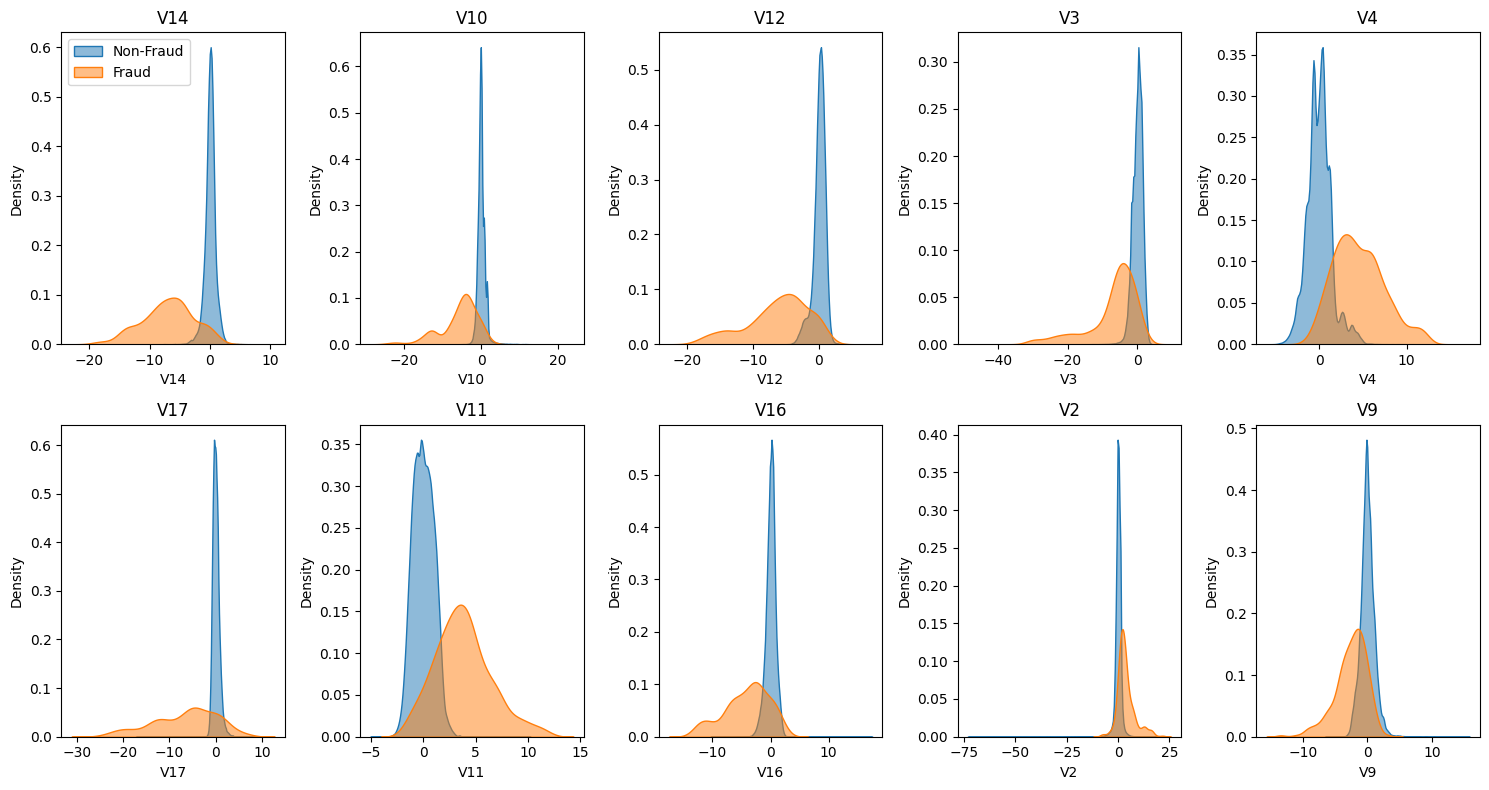

In [24]:
import seaborn as sns

# the list of Top 10 feature
top_features = ['V14','V10','V12','V3','V4','V17','V11','V16','V2','V9']

# graph for Fraud nd non-fraud
plt.figure(figsize=(15,8))
for i, feature in enumerate(top_features):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(data[data['Class']==0], x=feature, fill=True, label='Non-Fraud', alpha=0.5)
    sns.kdeplot(data[data['Class']==1], x=feature, fill=True, label='Fraud', alpha=0.5)
    plt.title(feature)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# Randomized Search (5-fold CV)
search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                            n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)
search.fit(X_train_resample, y_train_resample)


best_rf = search.best_estimator_
print("Best Parameters:", search.best_params_)

y_pred_best = best_rf.predict(X_test_scaled)
print("\n📊 Classification Report (Tuned RF):")
print(classification_report(y_test, y_pred_best, digits=4))


In [ ]:
import pickle

with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("model saved in pickle")
